In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
dataset = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data cleaning

### Check for missing values

In [71]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [72]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [73]:
dataset.loc[:122, "Region"] = 0
dataset.loc[122:, "Region"] = 1

In [74]:
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0


In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


### Convert float into int to save memory

In [76]:
dataset[['Region']] = dataset[['Region']].astype(int)

In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.0+ KB


### Remove null values

In [78]:
dataset.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [79]:
dataset.iloc[122]

day            Sidi-Bel Abbes Region Dataset
month                                    NaN
year                                     NaN
Temperature                              NaN
 RH                                      NaN
 Ws                                      NaN
Rain                                     NaN
FFMC                                     NaN
DMC                                      NaN
DC                                       NaN
ISI                                      NaN
BUI                                      NaN
FWI                                      NaN
Classes                                  NaN
Region                                     1
Name: 122, dtype: object

In [80]:
dataset = dataset.dropna().reset_index(drop=True)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [81]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [82]:
dataset.iloc[122]

day                    day
month                month
year                  year
Temperature    Temperature
 RH                     RH
 Ws                     Ws
Rain                 Rain 
FFMC                  FFMC
DMC                    DMC
DC                      DC
ISI                    ISI
BUI                    BUI
FWI                    FWI
Classes          Classes  
Region                   1
Name: 122, dtype: object

In [83]:
dataset = dataset.drop(122).reset_index(drop=True)
dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


#### Remove the extra white space in column names

In [84]:
dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [85]:
dataset.columns = dataset.columns.str.strip()
dataset.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [86]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 27.7+ KB


### Change the data type from object to float

In [87]:
dataset[['month','day', 'year', 'Temperature', 'RH', 'Ws']] = dataset[['month','day', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int32 
 1   month        243 non-null    int32 
 2   year         243 non-null    int32 
 3   Temperature  243 non-null    int32 
 4   RH           243 non-null    int32 
 5   Ws           243 non-null    int32 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int32 
dtypes: int32(7), object(8)
memory usage: 22.0+ KB


#### Change other data types

In [89]:
objects = [features for features in dataset.columns if dataset[features].dtypes=='O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [90]:
for i in objects:
    if i != 'Classes':
        dataset[i] = dataset[i].astype(float)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [92]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
day,243.0,15.761317,8.842552,1.0,8.00,16.0,23.00,31.0
month,243.0,7.502058,1.114793,6.0,7.00,8.0,8.00,9.0
year,243.0,2012.000000,0.000000,2012.0,2012.00,2012.0,2012.00,2012.0
Temperature,243.0,32.152263,3.628039,22.0,30.00,32.0,35.00,42.0
RH,243.0,62.041152,14.828160,21.0,52.50,63.0,73.50,90.0
Ws,243.0,15.493827,2.811385,6.0,14.00,15.0,17.00,29.0
Rain,243.0,0.762963,2.003207,0.0,0.00,0.0,0.50,16.8
FFMC,243.0,77.842387,14.349641,28.6,71.85,83.3,88.30,96.0
DMC,243.0,14.680658,12.393040,0.7,5.80,11.3,20.80,65.9
DC,243.0,49.430864,47.665606,6.9,12.35,33.1,69.10,220.4


# EDA feature engineering

In [93]:
dataset.to_csv('Algerian_forest_fires_cleaned_dataset.csv', index=False)

In [94]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


### Drop day month and year since its not important

In [96]:
df_copy = df.drop(['day', 'month', 'year'], axis=1)
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [97]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [98]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'), 0,1)

In [99]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [101]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [100]:
df_copy['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# Data visualization

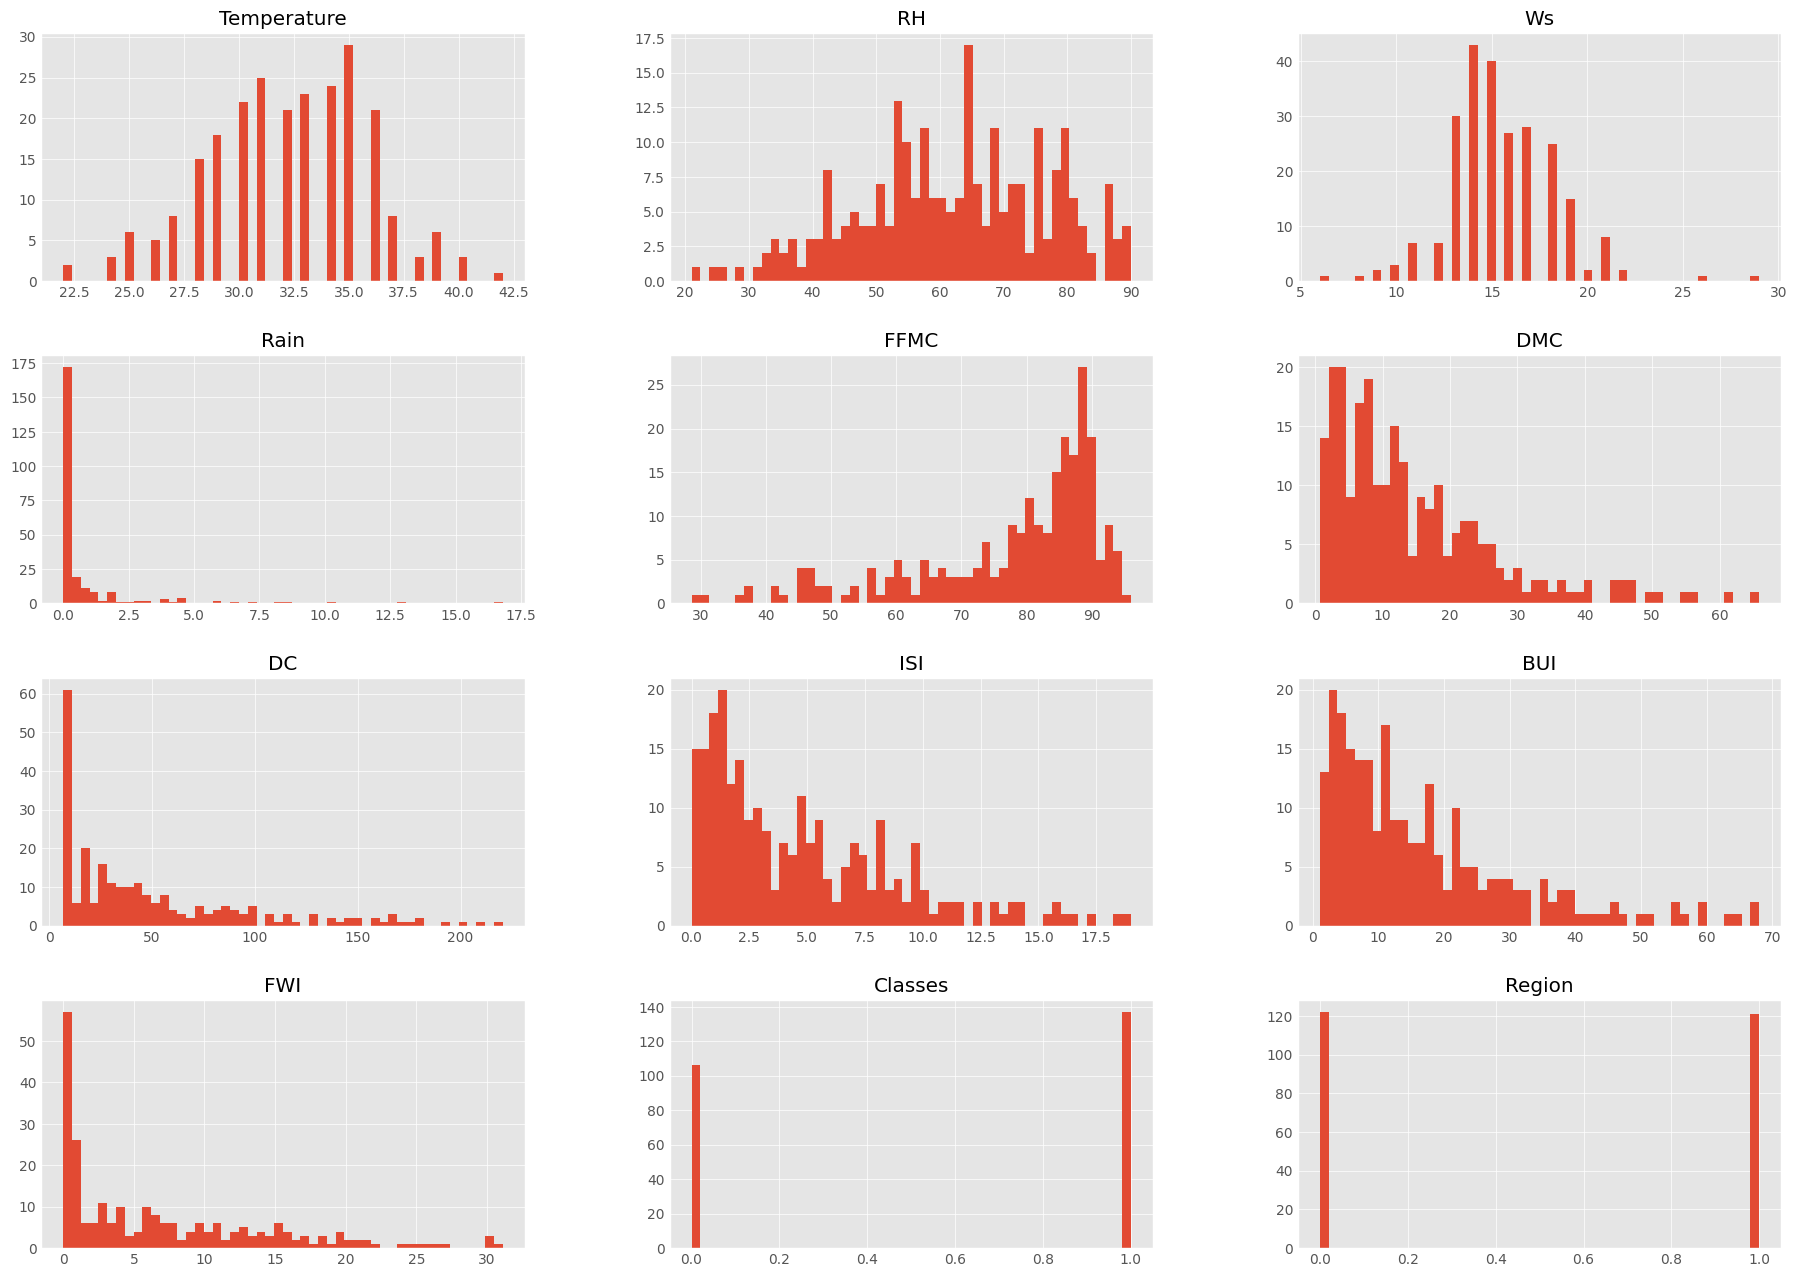

In [107]:
plt.style.use('ggplot')
df_copy.hist(bins=50, figsize=(20,15))
plt.show()

# Pie chart representaion of fire and not fire

In [111]:
percentages = df_copy['Classes'].value_counts(normalize=True)*100  # using normalize=true will give in percentage
percentages

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Pie Chart representation for fire and not fire')

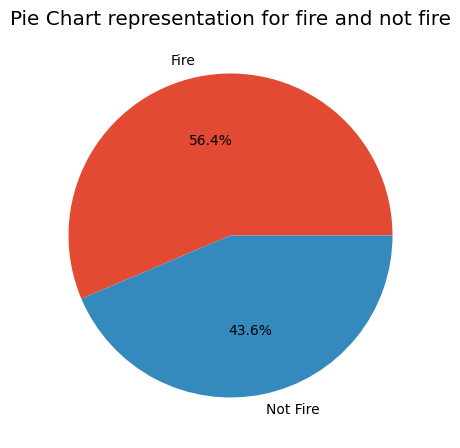

In [114]:
classLabels = ['Fire', 'Not Fire']
plt.figure(figsize=(8, 5))
plt.pie(percentages, labels=classLabels, autopct='%1.1f%%')
plt.title('Pie Chart representation for fire and not fire')

# Check correlations

In [118]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


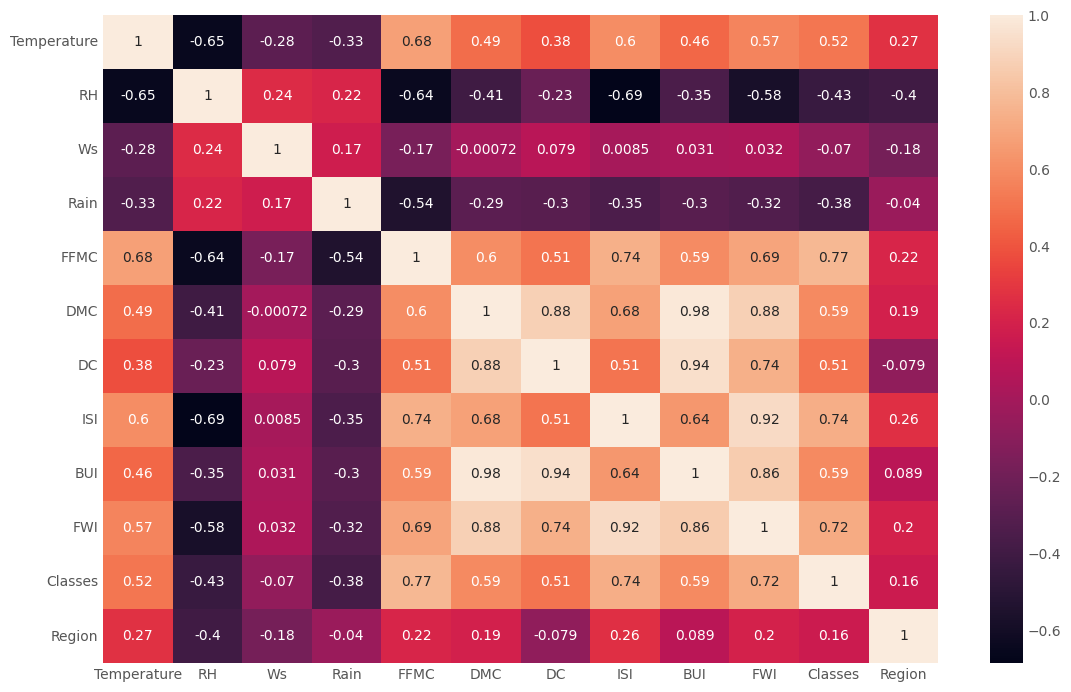

In [125]:
# Set the desired figure size
plt.figure(figsize=(12, 8))  # Adjust width and height as needed

# Plot the heatmap
sns.heatmap(df_copy.corr(), annot=True)

# Show the plot
plt.show()


<Axes: xlabel='FWI'>

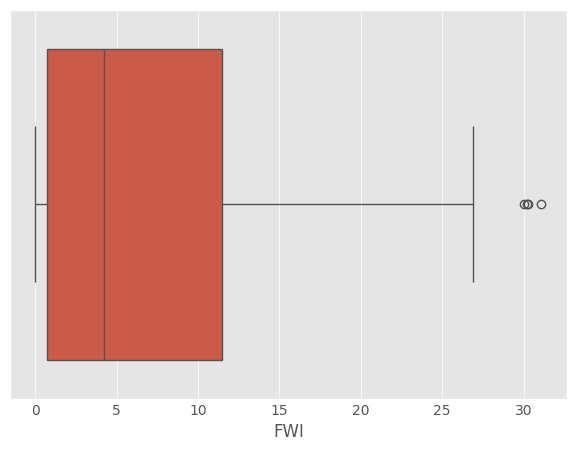

In [130]:
sns.boxplot(df['FWI'], orient='y')

# Monthly fire analysis

<Axes: xlabel='month', ylabel='count'>

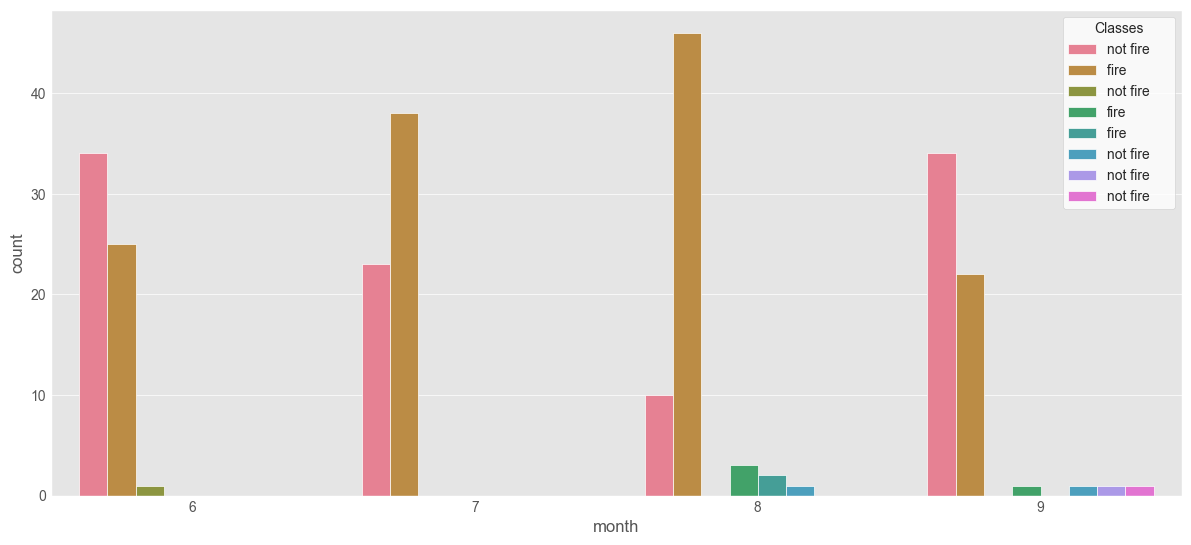

In [133]:
df_temp = df.loc[df['Region']==1]
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')
sns.countplot(x='month', hue='Classes', data=df)

# Feature Selection and model training

In [134]:
algerian_df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
algerian_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [135]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [136]:
algerian_df.drop(['day','month','year'], axis=1, inplace=True)
algerian_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [138]:
algerian_df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [139]:
algerian_df['Classes'] = np.where(algerian_df['Classes'].str.contains('not fire'),0,1)

In [140]:
algerian_df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

# Divide the features into dependent and independent features

In [141]:
X = algerian_df.drop('FWI', axis=1)
y = algerian_df['FWI']

In [142]:
X[:5]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [143]:
y[:5]

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

# Train test split

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1011)

# Features selections based on correlations

In [146]:
algerian_df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


# Check for multicollinearity

<Axes: >

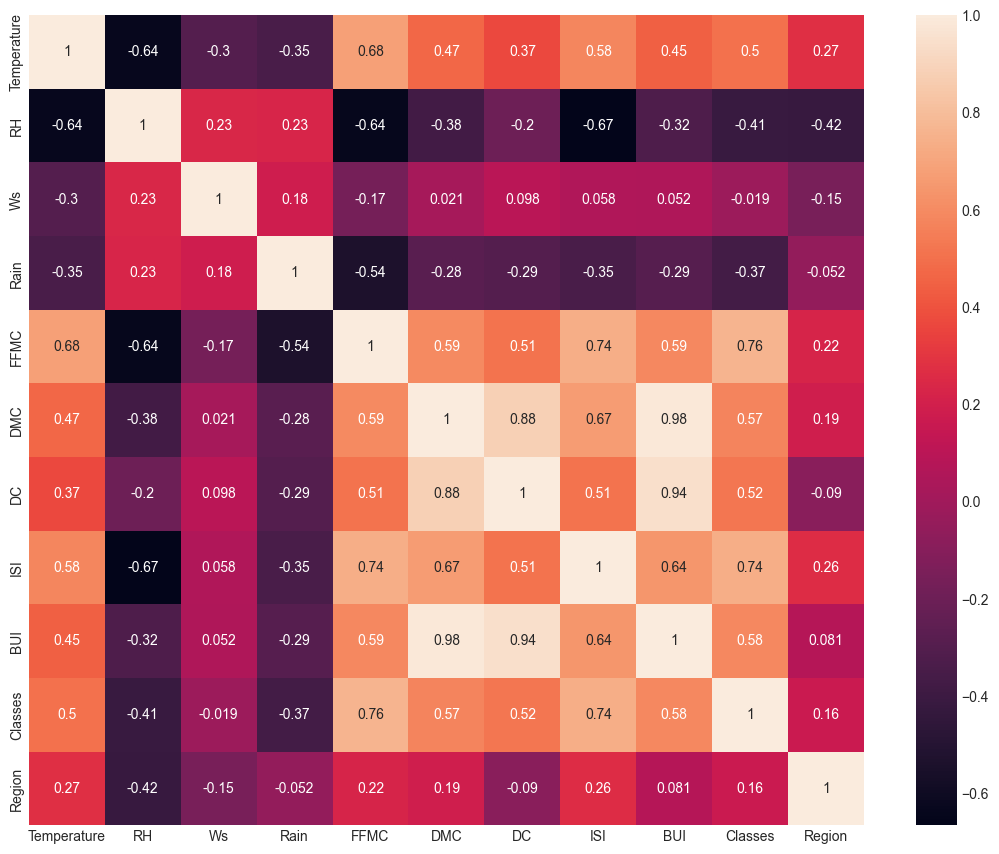

In [147]:
plt.figure(figsize=(12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot=True)

### the below function will check the correlation between the features. according to the threshold value.. if the correlation is higher than the threshold value then till be added to the col_corr set, we use a set because we dont need duplicate values

In [150]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [153]:
corr_features=correlation(X_train,0.85)

In [154]:
corr_features

{'BUI', 'DC'}

# Drop featues which has a correlation greater than 0.85

In [155]:
X_train.drop(corr_features, axis=1, inplace=True)
X_test.drop(corr_features, axis=1, inplace=True)

In [156]:
X_train.shape, X_test.shape

((182, 9), (61, 9))

# Features scaling

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()

In [161]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [162]:
scaled_X_train[:5]

array([[ 1.03178569, -0.2830081 ,  1.18085026, -0.3736166 ,  0.74777185,
         1.18647738,  1.09694952,  0.8660254 , -0.9569689 ],
       [ 1.30998568, -1.56005289, -0.95406445, -0.3736166 ,  0.97991895,
         0.60088585,  1.49082339,  0.8660254 ,  1.04496604],
       [ 0.75358569,  0.1426735 ,  0.46921202, -0.3736166 ,  0.6492852 ,
         1.37097882,  0.50613873,  0.8660254 , -0.9569689 ],
       [ 0.4753857 , -0.63774276,  0.82503114, -0.3736166 ,  0.77591089,
         0.54473323,  1.09694952,  0.8660254 , -0.9569689 ],
       [-0.08101428, -0.14111423, -0.59824533, -0.28283126, -0.06122561,
        -0.70666785, -0.72471708, -1.15470054,  1.04496604]])

In [163]:
scaled_X_test[:5]

array([[ 0.75358569, -1.13437129, -0.95406445, -0.23743859,  0.41713811,
         0.16770855, -0.30622611,  0.8660254 ,  1.04496604],
       [ 0.4753857 ,  0.21362044, -0.95406445, -0.3736166 ,  0.62114616,
        -0.29755596,  0.11226487,  0.8660254 , -0.9569689 ],
       [ 0.75358569,  0.07172657, -0.24242621, -0.3736166 ,  0.63521568,
         0.33616639,  0.28458469,  0.8660254 , -0.9569689 ],
       [-1.19381425,  1.2068775 ,  0.82503114, -0.32822393, -0.32151175,
         0.12759954, -0.72471708, -1.15470054, -0.9569689 ],
       [-0.08101428,  0.3555143 , -0.59824533,  1.6690536 , -0.94057067,
        -0.83501668, -0.92165402, -1.15470054,  1.04496604]])

# Boxplot to check outliers

Text(0.5, 1.0, 'X_train after Scaling')

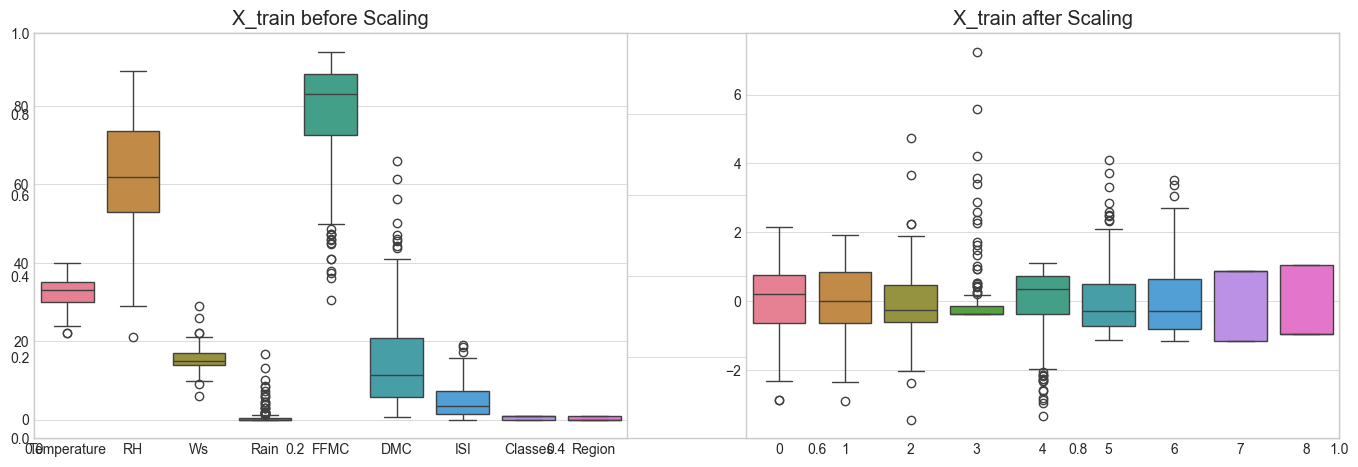

In [164]:
plt.subplots(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_X_train)
plt.title('X_train after Scaling')

# Model training with Linear Regression Model

In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [170]:
regressor_linear = LinearRegression()
regressor_linear.fit(scaled_X_train, y_train)
y_pred_linear = regressor_linear.predict(scaled_X_test)

In [171]:
MAE_l = mean_absolute_error(y_test, y_pred_linear)
MSE_l = mean_squared_error(y_test, y_pred_linear)
RMSE_l = np.sqrt(MSE_l)
r2_l = r2_score(y_test, y_pred_linear)

errors_l = pd.DataFrame({"MAE":MAE_l, "MSE":MSE_l, "RMSE":RMSE_l, "R2":r2_l}, index=['error_linear_reg'])
errors_l

,MAE,MSE,RMSE,R2
error_linear_reg,0.717461,0.930038,0.964385,0.984568


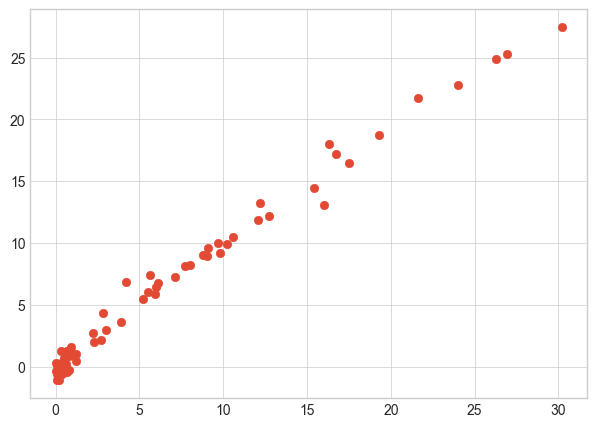

In [172]:
plt.scatter(y_test, y_pred_linear)

# Model creation using Lasso Regression

In [182]:
from sklearn.linear_model import Lasso

In [183]:
regressor_lasso = Lasso()
regressor_lasso.fit(scaled_X_train, y_train)
y_pred_lasso = regressor_lasso.predict(scaled_X_test)

In [184]:
MAE_lasso = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso = np.sqrt(MSE_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

errors_lasso = pd.DataFrame({"MAE":MAE_lasso, "MSE":MSE_lasso, "RMSE":RMSE_lasso, "R2":r2_lasso}, index=['error_lasso_reg'])
errors_lasso

,MAE,MSE,RMSE,R2
error_lasso_reg,1.208401,2.858962,1.690847,0.952562


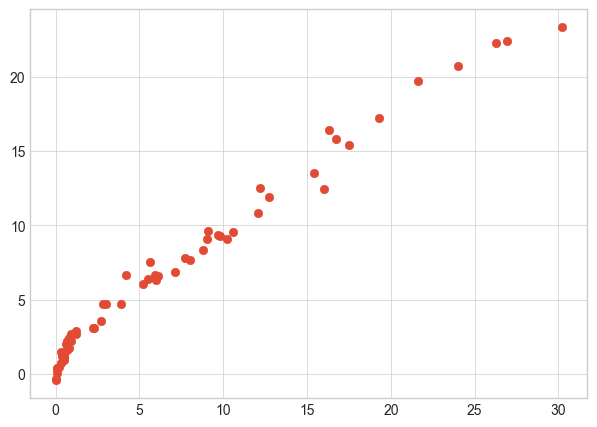

In [185]:
plt.scatter(y_test, y_pred_lasso)

# Model Creationg using Ridge

In [186]:
from sklearn.linear_model import Ridge

In [187]:
regressor_ridge = Ridge()
regressor_ridge.fit(scaled_X_train, y_train)
y_pred_ridge = regressor_ridge.predict(scaled_X_test)

In [188]:
MAE_ridge = mean_absolute_error(y_test, y_pred_ridge)
MSE_ridge = mean_squared_error(y_test, y_pred_ridge)
RMSE_ridge = np.sqrt(MSE_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

errors_ridge = pd.DataFrame({"MAE":MAE_ridge, "MSE":MSE_ridge, "RMSE":RMSE_ridge, "R2":r2_ridge}, index=['error_ridge_reg'])
errors_ridge

,MAE,MSE,RMSE,R2
error_ridge_reg,0.72547,0.961924,0.980777,0.984039


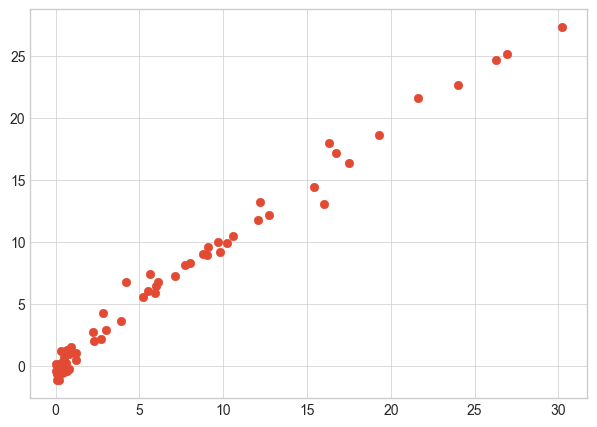

In [189]:
plt.scatter(y_test, y_pred_ridge)

# Model Creationg using Ridge

In [191]:
from sklearn.linear_model import ElasticNet

In [192]:
regressor_elastic = ElasticNet()
regressor_elastic.fit(scaled_X_train, y_train)
y_pred_elastic = regressor_elastic.predict(scaled_X_test)

In [195]:
MAE_elastic = mean_absolute_error(y_test, y_pred_elastic)
MSE_elastic = mean_squared_error(y_test, y_pred_elastic)
RMSE_elastic = np.sqrt(MSE_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

errors_elastic = pd.DataFrame({"MAE":MAE_ridge, "MSE":MSE_ridge, "RMSE":RMSE_ridge, "R2":r2_ridge}, index=['error_elastic_reg'])
errors_elastic

,MAE,MSE,RMSE,R2
error_elastic_reg,0.72547,0.961924,0.980777,0.984039


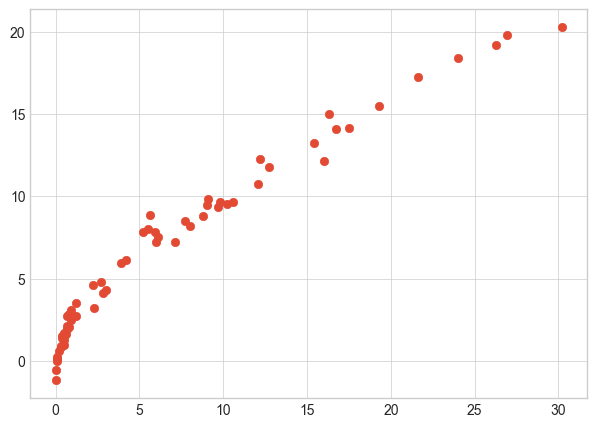

In [196]:
plt.scatter(y_test, y_pred_elastic)

# Model creation using LassoCV

In [197]:
from sklearn.linear_model import LassoCV

In [199]:
lassocv = LassoCV(cv=5)
lassocv.fit(scaled_X_train, y_train)

LassoCV(cv=5)

In [200]:
y_pred_lassocv = lassocv.predict(scaled_X_test)
y_pred_lassocv

array([ 5.89350058,  6.79341734,  9.83362315,  4.47785376, -0.35616773,
        3.37786959,  8.22771835,  2.27765435,  8.06761797,  6.47910735,
       24.74139812,  5.41637523,  2.77308159,  9.02638382,  1.24533036,
        0.605935  ,  1.26418722,  9.71781745, 13.2893938 ,  0.39006779,
        7.17712243,  0.49410277, -0.4450598 ,  0.97030389, 10.44143292,
       22.67358685, -0.77168029,  0.98413447,  1.16482986, -0.25183998,
       21.63399937, 17.12109089,  3.80075329,  1.24512665, 18.58993082,
       -1.01325493,  9.2346696 ,  0.07465595, 18.01680035, -0.72524207,
       16.43874233, 27.032099  ,  0.13815589,  7.32345162,  1.08644371,
        6.86054073, -0.15475161, 11.82100388, -0.11002937,  9.01056645,
       13.0713341 ,  6.00410805,  9.99637655, 14.26282557, -1.242085  ,
        2.49186739,  1.86280444, -0.10981191, 12.23805213, -0.36803042,
       24.99867256])

In [201]:
lassocv.alpha_

0.050450780717508525

In [202]:
lassocv.alphas_

array([6.6692963 , 6.21980805, 5.80061381, 5.40967185, 5.04507807,
       4.7050567 , 4.38795162, 4.09221837, 3.81641655, 3.55920284,
       3.31932448, 3.09561312, 2.88697916, 2.69240643, 2.51094724,
       2.3417178 , 2.18389386, 2.03670672, 1.89943951, 1.77142364,
       1.65203562, 1.54069395, 1.43685633, 1.34001702, 1.24970436,
       1.16547847, 1.08692912, 1.01367374, 0.94535552, 0.88164172,
       0.82222202, 0.76680701, 0.71512678, 0.66692963, 0.62198081,
       0.58006138, 0.54096718, 0.50450781, 0.47050567, 0.43879516,
       0.40922184, 0.38164165, 0.35592028, 0.33193245, 0.30956131,
       0.28869792, 0.26924064, 0.25109472, 0.23417178, 0.21838939,
       0.20367067, 0.18994395, 0.17714236, 0.16520356, 0.15406939,
       0.14368563, 0.1340017 , 0.12497044, 0.11654785, 0.10869291,
       0.10136737, 0.09453555, 0.08816417, 0.0822222 , 0.0766807 ,
       0.07151268, 0.06669296, 0.06219808, 0.05800614, 0.05409672,
       0.05045078, 0.04705057, 0.04387952, 0.04092218, 0.03816

In [203]:
lassocv.mse_path_

array([[50.46026941, 48.37262118, 79.77449032, 32.69163584, 49.00902163],
       [44.44646567, 44.11422572, 79.77449032, 28.781265  , 44.11199196],
       [39.01458729, 40.3548883 , 79.77449032, 25.36909613, 39.58437425],
       [34.28226587, 37.0333535 , 71.67887923, 22.39099749, 34.90317652],
       [30.15899173, 34.09609195, 62.14038496, 19.79111167, 30.8103939 ],
       [26.5658854 , 31.49631097, 53.91543554, 17.52085174, 27.23056536],
       [23.4342998 , 27.51344956, 46.8283017 , 15.53788032, 24.09860892],
       [20.70467177, 24.0066355 , 40.72600284, 13.805325  , 21.3572492 ],
       [18.32498935, 20.96502452, 35.47648075, 12.29113653, 18.95677945],
       [16.25004859, 18.3274892 , 30.9645768 , 10.96734695, 16.85388854],
       [14.44045976, 16.04086568, 27.09058528,  9.80961662, 15.0108332 ],
       [12.86209088, 14.05895062, 23.76803194,  8.7967452 , 13.39450743],
       [11.48507622, 12.3415922 , 20.92165415,  7.91023648, 11.97668313],
       [10.28347425, 10.85338927, 18.4

In [205]:
MAE_lassocv = mean_absolute_error(y_test, y_pred_lassocv)
MSE_lassocv = mean_squared_error(y_test, y_pred_lassocv)
RMSE_lassocv = np.sqrt(MSE_lassocv)
r2_lassocv = r2_score(y_test, y_pred_lassocv)

errors_lassocv = pd.DataFrame({"MAE":MAE_lassocv, "MSE":MSE_lassocv, "RMSE":RMSE_lassocv, "R2":r2_lassocv}, index=['error_lasso_cv'])
errors_lassocv

,MAE,MSE,RMSE,R2
error_lasso_cv,0.705711,0.975757,0.987804,0.983809


# Model Creation using RidgeCV

In [208]:
from sklearn.linear_model import RidgeCV

In [209]:
ridgecv = RidgeCV(cv=5)
ridgecv.fit(scaled_X_train, y_train)

RidgeCV(cv=5)

In [210]:
y_pred_ridgecv = ridgecv.predict(scaled_X_test)
y_pred_ridgecv

array([ 6.07842156,  6.76835604,  9.89310996,  4.29416582, -0.58671311,
        2.93113022,  8.27639151,  2.02575027,  8.13087631,  6.48393959,
       24.73598781,  5.56933406,  2.75233023,  8.98067595,  1.30456881,
        0.19758565,  1.23743864,  9.62050628, 13.22929968,  0.42441133,
        7.43339507,  0.71594723,  0.13298615,  0.94360599, 10.5236369 ,
       22.68653695, -0.40695731,  0.45830749,  1.15071776, -0.41601131,
       21.62852259, 17.18435236,  3.61480495,  1.06557943, 18.66954418,
       -1.10339961,  9.19580484, -0.2255414 , 17.99378012, -0.6374486 ,
       16.3710301 , 27.36587825,  0.25444074,  7.28071507,  1.18839134,
        6.81640723, -0.44750566, 11.80388299, -0.49560734,  9.05761433,
       13.10574763,  5.89094417, 10.00730701, 14.42862378, -1.17241092,
        2.14283181,  1.56809256,  0.1134934 , 12.16544485, -0.33384047,
       25.20100566])

In [211]:
MAE_ridgecv = mean_absolute_error(y_test, y_pred_ridgecv)
MSE_ridgecv= mean_squared_error(y_test, y_pred_ridgecv)
RMSE_ridgecv = np.sqrt(MSE_ridgecv)
r2_ridgecv = r2_score(y_test, y_pred_ridgecv)

errors_ridgecv = pd.DataFrame({"MAE":MAE_ridgecv, "MSE":MSE_ridgecv, "RMSE":RMSE_ridgecv, "R2":r2_ridgecv}, index=['error_ridge_cv'])
errors_ridgecv

,MAE,MSE,RMSE,R2
error_ridge_cv,0.72547,0.961924,0.980777,0.984039


In [212]:
ridgecv.alpha_

1.0

In [213]:
ridgecv.coef_

array([-0.0066601 , -0.18348566,  0.09495007, -0.06854395, -0.80228661,
        3.60224297,  4.41891788,  0.52363032, -0.45779513])

In [215]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Model creation using elasticnetcv

In [217]:
from sklearn.linear_model import ElasticNetCV

In [218]:
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(scaled_X_train, y_train)

ElasticNetCV(cv=5)

In [219]:
y_pred_elasticcv = elasticcv.predict(scaled_X_test)
y_pred_elasticcv

array([ 6.24792192,  6.85758684,  9.88801944,  4.38597465, -0.36639132,
        3.26953128,  8.35974362,  2.26859902,  8.10193439,  6.58579088,
       24.14109626,  5.76577545,  2.95970129,  9.11688409,  1.35596414,
        0.39487443,  1.28230789,  9.77032817, 13.27711417,  0.43847607,
        7.47364209,  0.66488855, -0.7131461 ,  1.16033031, 10.50919785,
       22.10003766, -0.84539065,  0.86803979,  1.31134434, -0.20954156,
       21.1136742 , 16.93812545,  3.95231507,  1.3835854 , 18.2603743 ,
       -1.09634672,  9.28121465,  0.16363456, 17.88289547, -0.87842751,
       16.14583547, 26.65055515,  0.20990396,  7.42621164,  0.84981596,
        6.79779902, -0.13904341, 11.71629636, -0.33586851,  9.1121491 ,
       13.06463382,  6.1012783 ,  9.95035095, 14.27220164, -1.35679753,
        2.56387221,  1.66556326, -0.15421163, 12.11419959, -0.19793286,
       24.67067198])

In [222]:
MAE_elasticcv = mean_absolute_error(y_test, y_pred_ridgecv)
MSE_elasticcv= mean_squared_error(y_test, y_pred_ridgecv)
RMSE_elasticcv = np.sqrt(MSE_elasticcv)
r2_elasticcv = r2_score(y_test, y_pred_ridgecv)

errors_elasticcv = pd.DataFrame({"MAE":MAE_elasticcv, "MSE":MSE_elasticcv, "RMSE":RMSE_elasticcv, "R2":r2_elasticcv}, index=['error_elastic_cv'])
errors_elasticcv

,MAE,MSE,RMSE,R2
error_elastic_cv,0.72547,0.961924,0.980777,0.984039


In [223]:
elasticcv.alpha_

0.05773958319336801

In [224]:
elasticcv.alphas_

array([13.3385926 , 12.4396161 , 11.60122761, 10.8193437 , 10.09015614,
        9.41011339,  8.77590324,  8.18443674,  7.63283309,  7.11840569,
        6.63864897,  6.19122625,  5.77395832,  5.38481285,  5.02189449,
        4.68343561,  4.36778772,  4.07341345,  3.79887902,  3.54284728,
        3.30407124,  3.08138789,  2.87371266,  2.68003405,  2.49940872,
        2.33095694,  2.17385824,  2.02734747,  1.89071104,  1.76328344,
        1.64444404,  1.53361402,  1.43025356,  1.33385926,  1.24396161,
        1.16012276,  1.08193437,  1.00901561,  0.94101134,  0.87759032,
        0.81844367,  0.76328331,  0.71184057,  0.6638649 ,  0.61912262,
        0.57739583,  0.53848129,  0.50218945,  0.46834356,  0.43677877,
        0.40734134,  0.3798879 ,  0.35428473,  0.33040712,  0.30813879,
        0.28737127,  0.2680034 ,  0.24994087,  0.23309569,  0.21738582,
        0.20273475,  0.1890711 ,  0.17632834,  0.1644444 ,  0.1533614 ,
        0.14302536,  0.13338593,  0.12439616,  0.11601228,  0.10

In [ ]:
elasticcv